In [10]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from skimage.util import img_as_ubyte
from skimage.morphology import disk 
from skimage.morphology import erosion, dilation

*PREPROCESSING*

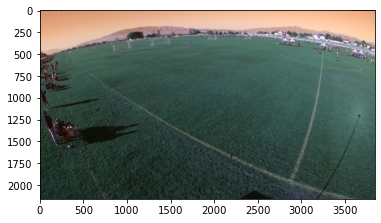

In [11]:
im_org = cv2.imread("field_frame.jpg")
plt.imshow(im_org)

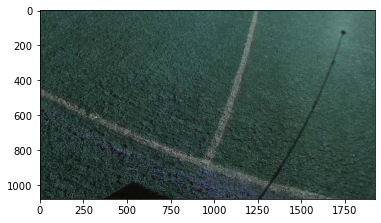

In [12]:
#take only down-right corner
cropped_im = im_org[int(im_org.shape[0]/2):, int(im_org.shape[1]/2):]
plt.imshow(cropped_im)

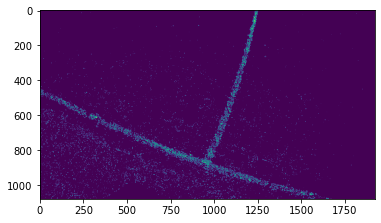

In [13]:
#extract rgb
r_comp = cropped_im[:, :, 0]
g_comp = cropped_im[:, :, 1]
b_comp = cropped_im[:, :, 2] 

thres = 120

# take only the white parts
white_im = (r_comp > thres) & (g_comp > thres) & (b_comp  > thres)

white_im = img_as_ubyte(white_im)

plt.imshow(white_im)

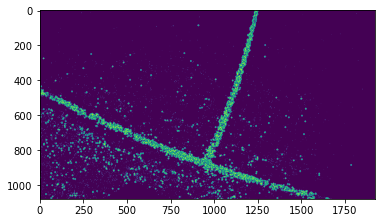

In [14]:
footprint_e = disk(1.5)
footprint_d = disk(4)
ero_im = erosion(white_im, footprint_e)
dil_im = dilation(ero_im, footprint_d)
outline = np.logical_xor(dil_im, white_im)
outline = img_as_ubyte(outline)

plt.imshow(outline)

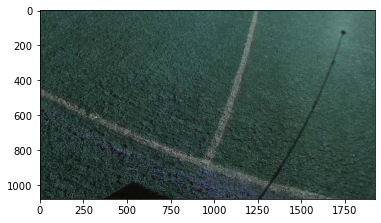

In [15]:
test = cropped_im.copy()
plt.imshow(test)

In [16]:
def line_intersection(line1, line2):
    xdiff = (line1[0][0] - line1[1][0], line2[0][0] - line2[1][0])
    ydiff = (line1[0][1] - line1[1][1], line2[0][1] - line2[1][1])

    def det(a, b):
        return a[0] * b[1] - a[1] * b[0]

    div = det(xdiff, ydiff)
    if div == 0:
       raise Exception('lines do not intersect')

    d = (det(*line1), det(*line2))
    x = det(d, xdiff) / div
    y = det(d, ydiff) / div
    return int(x), int(y)


[ 943  996 1247    0]
(979, 875)
Number of lines: 2


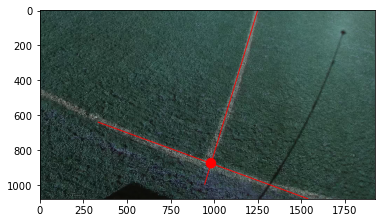

In [17]:
lines = cv2.HoughLinesP(
            outline, # Input edge image
            100, # Distance resolution in pixels
            np.pi/180, # Angle resolution in radians
            threshold=100, # Min number of votes for valid line
            minLineLength=900, # Min allowed length of line
            maxLineGap=30 # Max allowed gap between line for joining them
            )

# Iterate over points
for points in lines:
      # Extracted points nested in the list
    x1,y1,x2,y2=points[0]
    
    # Draw the lines joing the points
    # On the original image
    cv2.line(test,(x1,y1),(x2,y2),(255,0,0),4)
    
print(lines[1][0])
x1,y1,x2,y2=lines[0][0]

x1_,y1_,x2_,y2_=lines[1][0]

intersection = line_intersection(((x1, y1), (x2, y2)), ((x1_, y1_), (x2_, y2_)))
print(intersection)

cv2.circle(test, intersection, 10, (255, 0 , 0), 40)
    
print(f"Number of lines: {len(lines)}")
# Save the result image
plt.imshow(test)